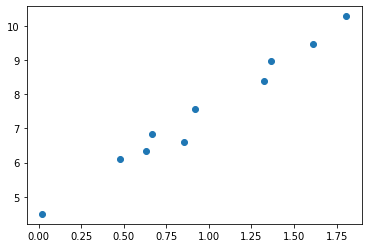

In [1]:
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(10, 1)
Y = 4 + 3 * X + np.random.rand(10, 1)
plt.plot(X, Y, 'o')


In [2]:
# Add 1s the first column of X values - this is because the first feature is the bias, and the second feature is the weight of X
X_b = np.c_[np.ones((10, 1)), X]

# Calculate the best linear params using the normal equation
lin_params = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
print(lin_params)

[[4.46211879]
 [3.14527345]]


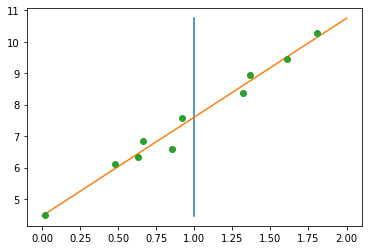

In [3]:
# plot the linear model line against the data
X_ends = np.c_[np.ones((2, 1)), np.array([[0], [2]])]
Y_ends = X_ends.dot(lin_params)
plt.plot(X_ends, Y_ends)
plt.plot(X, Y, 'o')
plt.show()

In [4]:
# Dot product of X and Xt
XtX = X_b.T.dot(X_b)
print(XtX)

[[10.          9.66357229]
 [ 9.66357229 12.10569098]]


In [5]:
XtX_inv = np.linalg.inv(XtX)
print(XtX_inv)

[[ 0.43746633 -0.34921489]
 [-0.34921489  0.36137246]]


In [6]:
XtY = X_b.T.dot(Y)
print(XtY)

[[75.01576523]
 [81.1957159 ]]


In [7]:
final_params = XtX_inv.dot(XtY)
print(final_params)

[[4.46211879]
 [3.14527345]]


In [8]:
predict = final_params[0][0] + final_params[1][0] * 1
print(predict)

7.607392237235073


## Batch Gradient Descent
Uses every instance in every iteration

In [9]:
def batch_decent(x, y):
    eta = 0.1 # learning rate
    n = 1000 # iterations
    theta = np.random.randn(2, 1) # random initializer
    for i in range(n):
        gradients = 2/x.size * x.T.dot(x.dot(theta) - y)
        theta = theta - eta * gradients
    return theta

final_theta = batch_decent(X_b, Y)
print(final_theta)

[[4.46211811]
 [3.14527406]]


## Stochastic Gradient Descent
Chooses only 1 random instance per iteration. It does cycle though a number of epochs.

In [10]:
def stochastic(x, y):
    epochs = 25
    t0, t1 = 5, 50 # hyperparameters
    theta = np.random.randn(2, 1) # random initializer
    for epoch in range(epochs):
        for i in range(x.size):
            rand_index = np.random.randint(x.size)
            rand_x = x[rand_index:rand_index+1]
            rand_y = y[rand_index:rand_index+1]
            gradients = 2 * rand_x.T.dot(rand_x.dot(theta) - rand_y)
            eta = t0 / (epoch * x.size + i + t1)
            theta = theta - eta * gradients
    return theta

final_theta = stochastic(X_b, Y)
print(final_theta)

[[4.22261163]
 [3.31578488]]


In [17]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(max_iter=100, tol=1e-3, penalty=None, eta0=0.1)
sgd.fit(X, Y.ravel())
print(sgd.intercept_, sgd.coef_)

[4.21694155] [3.37696452]


## Mini Batch Gradient Descent
Grab a set of random instances for each interation

In [18]:
def mini_batch_decent(x, y):
    eta = 0.1 # learning rate
    n = 1000 # iterations
    batch_size = 10
    theta = np.random.randn(2, 1) # random initializer
    for i in range(n):
        for j in range(batch_size):
            rand_index = np.random.randint(x.size)
            rand_x = x[rand_index:rand_index+1]
            rand_y = y[rand_index:rand_index+1]
            gradients = 2/x.size * rand_x.T.dot(rand_x.dot(theta) - rand_y)
            theta = theta - eta * gradients
    return theta

final_theta = mini_batch_decent(X_b, Y)
print(final_theta)

[[4.47024628]
 [3.14179089]]
